# Running Grover's algorithm on k4

## Define the graph
The graph being searched is the following:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Complete_graph_K4.svg/1024px-Complete_graph_K4.svg.png" alt="K4" style="width: 200px;"/>

The vertices will start at top left and go clockwise lexographically, i.e.

```
A    B

D    C
```

In [1]:
 edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C'), ('B', 'D')]

## Grover Experiments!
First, use the autowrapper, then break it down and see what's going on under the hood!

In [2]:
from graph_utils import groversearch, evaluators

### Running it on k4

In [3]:
groversearch.run_grovers(edges, plot=True)

Grover's search on n = 4 vertices:
Time elapsed: 0.24355125427246094s

      ┌───┐┌────┐┌─┐         
 q_0: ┤ H ├┤0   ├┤M├─────────
      ├───┤│    │└╥┘┌─┐      
 q_1: ┤ H ├┤1   ├─╫─┤M├──────
      ├───┤│    │ ║ └╥┘┌─┐   
 q_2: ┤ H ├┤2   ├─╫──╫─┤M├───
      ├───┤│    │ ║  ║ └╥┘┌─┐
 q_3: ┤ H ├┤3 Q ├─╫──╫──╫─┤M├
      └───┘│    │ ║  ║  ║ └╥┘
 q_4: ─────┤4   ├─╫──╫──╫──╫─
           │    │ ║  ║  ║  ║ 
 q_5: ─────┤5   ├─╫──╫──╫──╫─
           │    │ ║  ║  ║  ║ 
 q_6: ─────┤6   ├─╫──╫──╫──╫─
           └────┘ ║  ║  ║  ║ 
c0: 4/════════════╩══╩══╩══╩═
                  0  1  2  3 


[('B', 'C'), ('D', 'A'), ('A', 'C'), ('B', 'D')]

### Under the Hood

#### Generate the Ground Truth Table

In [4]:
evlr = evaluators.HamiltonianEvaluator(edges)
truth_table = evlr.generate_truth_table()
truth_table

{(('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')): True,
 (('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'C')): False,
 (('A', 'B'), ('B', 'C'), ('C', 'D'), ('B', 'D')): False,
 (('A', 'B'), ('B', 'C'), ('D', 'A'), ('A', 'C')): False,
 (('A', 'B'), ('B', 'C'), ('D', 'A'), ('B', 'D')): False,
 (('A', 'B'), ('B', 'C'), ('A', 'C'), ('B', 'D')): False,
 (('A', 'B'), ('C', 'D'), ('D', 'A'), ('A', 'C')): False,
 (('A', 'B'), ('C', 'D'), ('D', 'A'), ('B', 'D')): False,
 (('A', 'B'), ('C', 'D'), ('A', 'C'), ('B', 'D')): True,
 (('A', 'B'), ('D', 'A'), ('A', 'C'), ('B', 'D')): False,
 (('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C')): False,
 (('B', 'C'), ('C', 'D'), ('D', 'A'), ('B', 'D')): False,
 (('B', 'C'), ('C', 'D'), ('A', 'C'), ('B', 'D')): False,
 (('B', 'C'), ('D', 'A'), ('A', 'C'), ('B', 'D')): True,
 (('C', 'D'), ('D', 'A'), ('A', 'C'), ('B', 'D')): False}

And all of the Hamiltonian cycles

In [5]:
for edges, is_hamiltonian in truth_table.items():
    if is_hamiltonian:
        print(edges)

(('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'))
(('A', 'B'), ('C', 'D'), ('A', 'C'), ('B', 'D'))
(('B', 'C'), ('D', 'A'), ('A', 'C'), ('B', 'D'))


#### Running Grover's

In [6]:
truth_map = groversearch.get_truth_map(truth_table)
result = groversearch.call_grover(truth_map, len(evlr.vertices))

Grover's search on n = 4 vertices:
Time elapsed: 0.11566662788391113s



#### Visualization

In [7]:
from qiskit.tools.visualization import plot_histogram

Plot the probabilities of all of the combinations

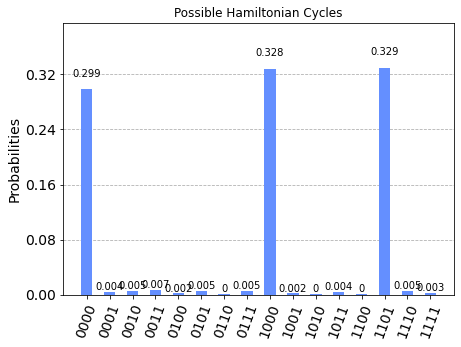

In [8]:
plot_histogram(result['measurement'], title='Possible Hamiltonian Cycles')

Create a quick helper function to convert enumerations into edge sets

In [9]:
combinations_set = list(truth_table.keys())
enumeration_to_edges = lambda bin_combo: combinations_set[int(str(bin_combo), 2)]

Interactive demo

In [ ]:
combo = input('Input the edge combination')
print(enumeration_to_edges(combo))